In [1]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
!wget -q https://www-us.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
!tar xf spark-3.0.1-bin-hadoop3.2.tgz

     |████████████████████████████████| 204.2MB 63kB/s 
     |████████████████████████████████| 204kB 37.4MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=c4a6c5d90c08e445ac591c0c7410ce50e875fb8b300e3cbeca8b48c4833cb9c4
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 14 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop3.2"
os.environ["PYTHONPATH"] = "%SPARK_HOME%\python;%SPARK_HOME%\python\lib\py4j-0.10.7-src.zip:%PYTHONPATH%"
import pyspark
print(pyspark.__version__)

3.0.1


In [3]:
!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
# Authenticate and create the PyDrive client. 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [4]:
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/My Drive/data_analysis/data.csv")
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


**The dataset is massive and comprises 260601 tuples and 39 columns**

In [7]:
df.head(20)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
5,333020,8,558,6089,2,10,9,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,2
6,728451,9,475,12066,2,25,3,4,n,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
7,475515,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
8,441126,0,757,7219,2,15,8,6,t,r,q,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
9,989500,26,886,994,1,0,13,4,t,i,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
df.count()

building_id                               260601
geo_level_1_id                            260601
geo_level_2_id                            260601
geo_level_3_id                            260601
count_floors_pre_eq                       260601
age                                       260601
area_percentage                           260601
height_percentage                         260601
land_surface_condition                    260601
foundation_type                           260601
roof_type                                 260601
ground_floor_type                         260601
other_floor_type                          260601
position                                  260601
plan_configuration                        260601
has_superstructure_adobe_mud              260601
has_superstructure_mud_mortar_stone       260601
has_superstructure_stone_flag             260601
has_superstructure_cement_mortar_stone    260601
has_superstructure_mud_mortar_brick       260601
has_superstructure_c

In [9]:
from pyspark import SparkContext

sc = SparkContext(appName='EarthQuakeDamage')

In [10]:
from pyspark.sql import SQLContext

sqlContext = SQLContext(sc);

In [11]:
import pyspark.sql.functions as F

In [12]:
# Convert pandas dataframe to pyspark
sdf = sqlContext.createDataFrame(df)
sdf.show(10)

+-----------+--------------+--------------+--------------+-------------------+---+---------------+-----------------+----------------------+---------------+---------+-----------------+----------------+--------+------------------+----------------------------+-----------------------------------+-----------------------------+--------------------------------------+-----------------------------------+--------------------------------------+-------------------------+-------------------------+------------------------------------+--------------------------------+------------------------+----------------------+--------------+-----------------+-----------------------------+-----------------------+------------------------+-----------------------------+------------------------+--------------------------+-----------------------------+----------------------------+----------------------------+-----------------------+------------+
|building_id|geo_level_1_id|geo_level_2_id|geo_level_3_id|count_floors_pr

In [13]:
import matplotlib.pyplot as plt

In [14]:
sdf.registerTempTable('earthq_damage')
sdf.printSchema()

root
 |-- building_id: long (nullable = true)
 |-- geo_level_1_id: long (nullable = true)
 |-- geo_level_2_id: long (nullable = true)
 |-- geo_level_3_id: long (nullable = true)
 |-- count_floors_pre_eq: long (nullable = true)
 |-- age: long (nullable = true)
 |-- area_percentage: long (nullable = true)
 |-- height_percentage: long (nullable = true)
 |-- land_surface_condition: string (nullable = true)
 |-- foundation_type: string (nullable = true)
 |-- roof_type: string (nullable = true)
 |-- ground_floor_type: string (nullable = true)
 |-- other_floor_type: string (nullable = true)
 |-- position: string (nullable = true)
 |-- plan_configuration: string (nullable = true)
 |-- has_superstructure_adobe_mud: long (nullable = true)
 |-- has_superstructure_mud_mortar_stone: long (nullable = true)
 |-- has_superstructure_stone_flag: long (nullable = true)
 |-- has_superstructure_cement_mortar_stone: long (nullable = true)
 |-- has_superstructure_mud_mortar_brick: long (nullable = true)
 |--

In [15]:
damage1 = sqlContext.sql(
    """SELECT geo_level_1_id,COUNT(building_id) FROM earthq_damage GROUP BY geo_level_1_id ORDER BY COUNT(building_id) DESC limit 20"""
)
damage1.show(20)

+--------------+------------------+
|geo_level_1_id|count(building_id)|
+--------------+------------------+
|             6|             24381|
|            26|             22615|
|            10|             22079|
|            17|             21813|
|             8|             19080|
|             7|             18994|
|            20|             17216|
|            21|             14889|
|             4|             14568|
|            27|             12532|
|            13|              9608|
|            11|              8220|
|             3|              7540|
|            22|              6252|
|            25|              5624|
|            16|              4332|
|             0|              4011|
|             9|              3958|
|            12|              3194|
|            18|              3189|
+--------------+------------------+



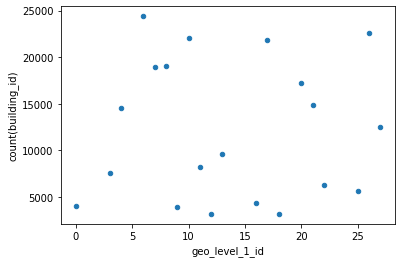

In [16]:
damage1_details = damage1.toPandas()
damage1_details.plot(kind='scatter',x='geo_level_1_id',y='count(building_id)')

In [17]:
damage2 = sqlContext.sql(
    """SELECT geo_level_2_id,COUNT(building_id) FROM earthq_damage GROUP BY geo_level_2_id ORDER BY COUNT(building_id) DESC limit 20"""
)
damage2.show(20)

+--------------+------------------+
|geo_level_2_id|count(building_id)|
+--------------+------------------+
|            39|              4038|
|           158|              2520|
|           181|              2080|
|          1387|              2040|
|           157|              1897|
|           363|              1760|
|           463|              1740|
|           673|              1704|
|           533|              1684|
|           883|              1626|
|          1394|              1537|
|           548|              1497|
|          1006|              1450|
|           720|              1359|
|           991|              1145|
|          1001|              1135|
|           889|              1114|
|           765|              1091|
|          1253|              1090|
|          1155|              1069|
+--------------+------------------+



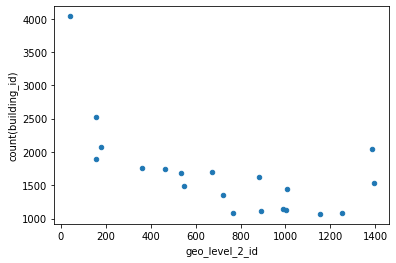

In [18]:
damage2_details = damage2.toPandas()
damage2_details.plot(kind='scatter',x='geo_level_2_id',y='count(building_id)')

In [19]:
damage3 = sqlContext.sql(
    """SELECT geo_level_3_id,COUNT(building_id) FROM earthq_damage GROUP BY geo_level_3_id ORDER BY COUNT(building_id) DESC limit 20"""
)
damage3.show(20)

+--------------+------------------+
|geo_level_3_id|count(building_id)|
+--------------+------------------+
|           633|               651|
|          9133|               647|
|           621|               530|
|         11246|               470|
|          2005|               466|
|         11440|               455|
|          7723|               443|
|          9229|               381|
|          2452|               349|
|         12258|               312|
|          8236|               303|
|         10445|               302|
|          6626|               283|
|          2170|               283|
|          2537|               259|
|            85|               252|
|           406|               251|
|          6973|               248|
|          7868|               247|
|          3904|               241|
+--------------+------------------+



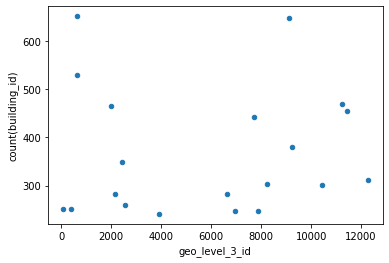

In [20]:
damage3_details = damage3.toPandas()
damage3_details.plot(kind='scatter',x='geo_level_3_id',y='count(building_id)')

+----------------------------+------------------+
|has_superstructure_adobe_mud|count(building_id)|
+----------------------------+------------------+
|                           1|             23101|
|                           0|            237500|
+----------------------------+------------------+



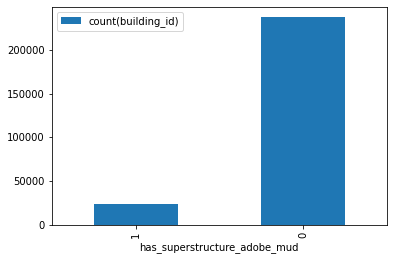

In [40]:
#no. of buildings damaged in earthquake has_superstructure_adobe_mud
super1 = sqlContext.sql(
    """SELECT has_superstructure_adobe_mud,COUNT(building_id) FROM earthq_damage GROUP BY has_superstructure_adobe_mud ORDER BY COUNT(building_id)"""
)
super1.show(10)
super1_details = super1.toPandas()
super1_details.plot(kind='bar',x='has_superstructure_adobe_mud',y='count(building_id)')

+-----------------------------------+------------------+
|has_superstructure_mud_mortar_stone|count(building_id)|
+-----------------------------------+------------------+
|                                  0|             62040|
|                                  1|            198561|
+-----------------------------------+------------------+



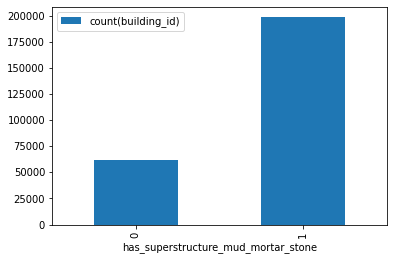

In [41]:
#no. of buildings damaged by earthquake has_superstructure_mud_mortar_stone
super2 = sqlContext.sql(
    """SELECT has_superstructure_mud_mortar_stone,COUNT(building_id) FROM earthq_damage GROUP BY has_superstructure_mud_mortar_stone ORDER BY COUNT(building_id)"""
)
super2.show()
super2_details = super2.toPandas()
super2_details.plot(kind='bar',x='has_superstructure_mud_mortar_stone',y='count(building_id)')

+-----------------------------+------------------+
|has_superstructure_stone_flag|count(building_id)|
+-----------------------------+------------------+
|                            1|              8947|
|                            0|            251654|
+-----------------------------+------------------+



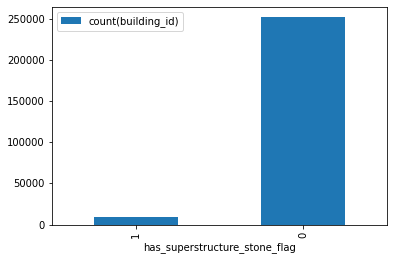

In [42]:
#no. of buildings damaged by earthquake has_superstructure_stone_flag
super3 = sqlContext.sql(
    """SELECT has_superstructure_stone_flag,COUNT(building_id) FROM earthq_damage GROUP BY has_superstructure_stone_flag ORDER BY COUNT(building_id)"""
)
super3.show()
super3_details = super3.toPandas()
super3_details.plot(kind='bar',x='has_superstructure_stone_flag',y='count(building_id)')

+--------------------------------------+------------------+
|has_superstructure_cement_mortar_stone|count(building_id)|
+--------------------------------------+------------------+
|                                     1|              4752|
|                                     0|            255849|
+--------------------------------------+------------------+



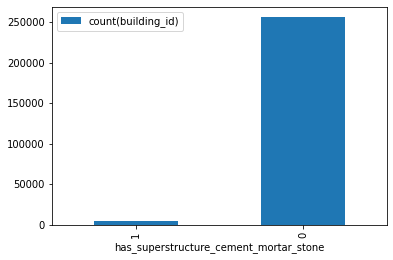

In [43]:
#no. of buildings damaged by earthquake has_superstructure_cement_mortar_stone
super4 = sqlContext.sql(
    """SELECT has_superstructure_cement_mortar_stone,COUNT(building_id) FROM earthq_damage GROUP BY has_superstructure_cement_mortar_stone ORDER BY COUNT(building_id)"""
)
super4.show()
super4_details = super4.toPandas()
super4_details.plot(kind='bar',x='has_superstructure_cement_mortar_stone',y='count(building_id)')

+-----------------------------------+------------------+
|has_superstructure_mud_mortar_brick|count(building_id)|
+-----------------------------------+------------------+
|                                  1|             17761|
|                                  0|            242840|
+-----------------------------------+------------------+



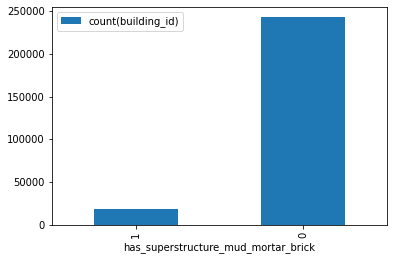

In [44]:
#no. of buildings damaged by earthquake has_superstructure_mud_mortar_brick
super5 = sqlContext.sql(
    """SELECT has_superstructure_mud_mortar_brick,COUNT(building_id) FROM earthq_damage GROUP BY has_superstructure_mud_mortar_brick ORDER BY COUNT(building_id)"""
)
super5.show()
super5_details = super5.toPandas()
super5_details.plot(kind='bar',x='has_superstructure_mud_mortar_brick',y='count(building_id)')

+--------------------------------------+------------------+
|has_superstructure_cement_mortar_brick|count(building_id)|
+--------------------------------------+------------------+
|                                     1|             19615|
|                                     0|            240986|
+--------------------------------------+------------------+



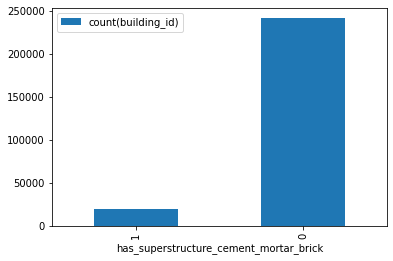

In [45]:
#no. of buildings damaged by earthquake has_superstructure_cement_mortar_brick
super6 = sqlContext.sql(
    """SELECT has_superstructure_cement_mortar_brick,COUNT(building_id) FROM earthq_damage GROUP BY has_superstructure_cement_mortar_brick ORDER BY COUNT(building_id)"""
)
super6.show()
super6_details = super6.toPandas()
super6_details.plot(kind='bar',x='has_superstructure_cement_mortar_brick',y='count(building_id)')

+-------------------------+------------------+
|has_superstructure_timber|count(building_id)|
+-------------------------+------------------+
|                        1|             66450|
|                        0|            194151|
+-------------------------+------------------+



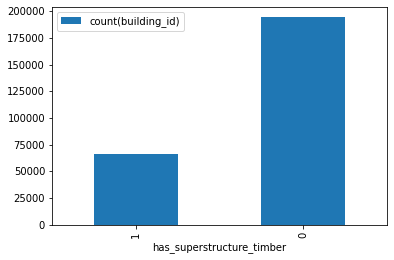

In [46]:
#no. of buildings damaged in earthquake has_superstructure_timber
super7 = sqlContext.sql(
    """SELECT has_superstructure_timber,COUNT(building_id) FROM earthq_damage GROUP BY has_superstructure_timber ORDER BY COUNT(building_id)"""
)
super7.show()
super7_details = super7.toPandas()
super7_details.plot(kind='bar',x='has_superstructure_timber',y='count(building_id)')

+-------------------------+------------------+
|has_superstructure_bamboo|count(building_id)|
+-------------------------+------------------+
|                        1|             22154|
|                        0|            238447|
+-------------------------+------------------+



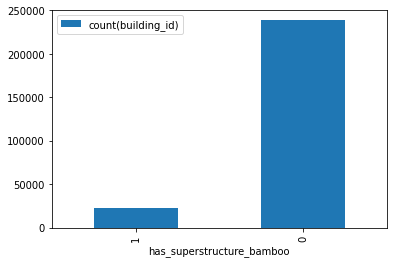

In [47]:
#no. of buildings damaged in earthquake has_superstructure_bamboo
super8 = sqlContext.sql(
    """SELECT has_superstructure_bamboo,COUNT(building_id) FROM earthq_damage GROUP BY has_superstructure_bamboo ORDER BY COUNT(building_id)"""
)
super8.show()
super8_details = super8.toPandas()
super8_details.plot(kind='bar',x='has_superstructure_bamboo',y='count(building_id)')

+---+------------------+
|age|count(building_id)|
+---+------------------+
| 10|             38896|
| 15|             36010|
|  5|             33697|
| 20|             32182|
|  0|             26041|
| 25|             24366|
| 30|             18028|
| 35|             10710|
| 40|             10559|
| 50|              7257|
| 45|              4711|
| 60|              3612|
| 80|              3055|
| 55|              2033|
| 70|              1975|
|995|              1390|
|100|              1364|
| 65|              1123|
| 90|              1085|
| 85|               847|
+---+------------------+



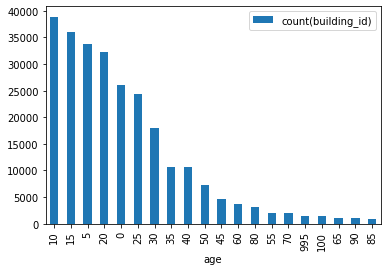

In [49]:
# ages of buildings damaged in earthquake 
build_age = sqlContext.sql(
    """SELECT age,COUNT(building_id) FROM earthq_damage GROUP BY age ORDER BY COUNT(building_id) DESC limit 20"""
)
build_age.show()
build_age_details = build_age.toPandas()
build_age_details.plot(kind='bar',x='age',y='count(building_id)')

**The buildings having ages 10,20,5,15 years damaged maximum during earthquake**

+---+-------------------+
|age|sum(count_families)|
+---+-------------------+
| 10|              38081|
| 15|              35562|
|  5|              32543|
| 20|              32067|
|  0|              24166|
| 25|              24343|
| 30|              18125|
| 35|              10684|
| 40|              10563|
| 50|               7231|
| 45|               4686|
| 60|               3564|
| 80|               3161|
| 55|               2013|
| 70|               1964|
|995|               1313|
|100|               1476|
| 65|               1115|
| 90|               1194|
| 85|                868|
+---+-------------------+



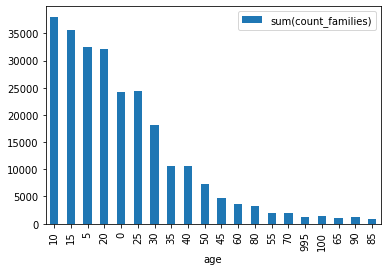

In [50]:
# Number of Families Vs age of Buildings 
families = sqlContext.sql(
    """SELECT age,SUM(count_families) FROM earthq_damage GROUP BY age ORDER BY COUNT(count_families) DESC limit 20"""
)
families.show()
families_details = families.toPandas()
families_details.plot(kind='bar',x='age',y='sum(count_families)')

## The buildings having ages 10,5,15,20 had maximim number of families 

+------------------------+------------------+
|has_secondary_use_school|count(building_id)|
+------------------------+------------------+
|                       1|                94|
|                       0|            260507|
+------------------------+------------------+



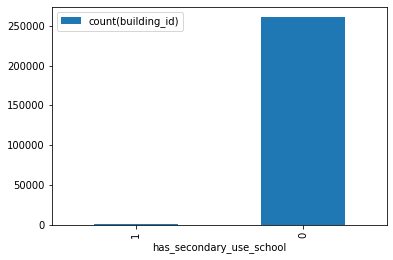

In [51]:
#no. of buildings damaged in earthquake has_secondary_use_school 
sec1 = sqlContext.sql(
    """SELECT has_secondary_use_school,COUNT(building_id) FROM earthq_damage GROUP BY has_secondary_use_school ORDER BY COUNT(building_id)"""
)
sec1.show()
sec1_details = sec1.toPandas()
sec1_details.plot(kind='bar',x='has_secondary_use_school',y='count(building_id)')

**A few Schools were damaged in earthquake**

+-----------------------------+------------------+
|has_secondary_use_agriculture|count(building_id)|
+-----------------------------+------------------+
|                            1|             16777|
|                            0|            243824|
+-----------------------------+------------------+



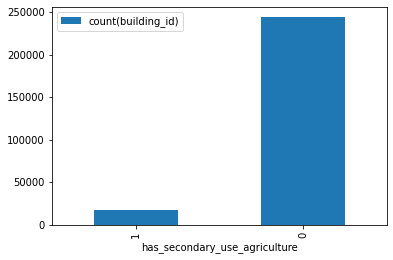

In [52]:
#no. of buildings damaged in earthquake has_secondary_use_agriculture
sec2 = sqlContext.sql(
    """SELECT has_secondary_use_agriculture,COUNT(building_id) FROM earthq_damage GROUP BY has_secondary_use_agriculture ORDER BY COUNT(building_id)"""
)
sec2.show()
sec2_details = sec2.toPandas()
sec2_details.plot(kind='bar',x='has_secondary_use_agriculture',y='count(building_id)')

+-----------------------------+------------------+
|has_secondary_use_health_post|count(building_id)|
+-----------------------------+------------------+
|                            1|                49|
|                            0|            260552|
+-----------------------------+------------------+



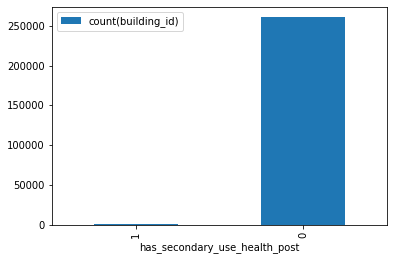

In [53]:
#no. of buildings damaged in earthquake has_secondary_use_health_pos
sec3 = sqlContext.sql(
    """SELECT has_secondary_use_health_post,COUNT(building_id) FROM earthq_damage GROUP BY has_secondary_use_health_post ORDER BY COUNT(building_id)"""
)
sec3.show()
sec3_details = sec3.toPandas()
sec3_details.plot(kind='bar',x='has_secondary_use_health_post',y='count(building_id)')

+------------------------+------------------+
|has_secondary_use_rental|count(building_id)|
+------------------------+------------------+
|                       1|              2111|
|                       0|            258490|
+------------------------+------------------+



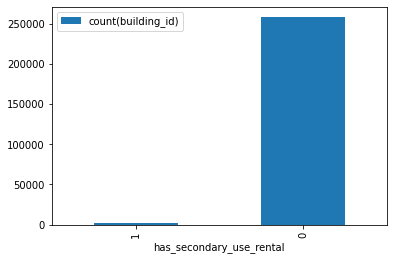

In [54]:
#no. of buildings damaged in earthquake has_secondary_use_renta
sec4 = sqlContext.sql(
    """SELECT has_secondary_use_rental,COUNT(building_id) FROM earthq_damage GROUP BY has_secondary_use_rental ORDER BY COUNT(building_id)"""
)
sec4.show()
sec4_details = sec4.toPandas()
sec4_details.plot(kind='bar',x='has_secondary_use_rental',y='count(building_id)')

+----------------------------+------------------+
|has_secondary_use_gov_office|count(building_id)|
+----------------------------+------------------+
|                           1|                38|
|                           0|            260563|
+----------------------------+------------------+



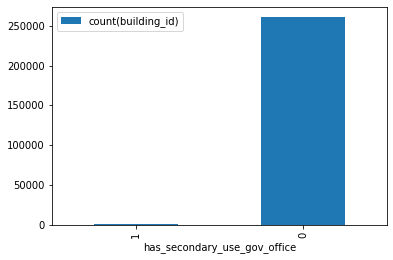

In [55]:
#no. of buildings damaged in earthquake has_secondary_use_gov_office
sec5 = sqlContext.sql(
    """SELECT has_secondary_use_gov_office,COUNT(building_id) FROM earthq_damage GROUP BY has_secondary_use_gov_office ORDER BY COUNT(building_id)"""
)
sec5.show()
sec5_details = sec5.toPandas()
sec5_details.plot(kind='bar',x='has_secondary_use_gov_office',y='count(building_id)')

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
from scipy.stats import boxcox
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


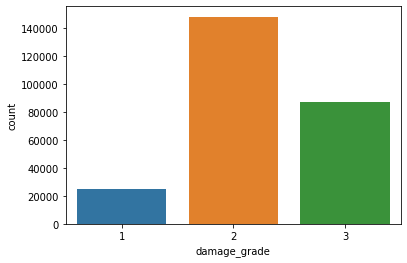

In [37]:
sns.countplot(df['damage_grade'])

In [38]:
pd.crosstab(df['foundation_type'], df['count_floors_pre_eq'])

count_floors_pre_eq,1,2,3,4,5,6,7,8,9
foundation_type,,,,,,,,,
h,533,790,107,17,1,0,0,0,0
i,3228,3482,2303,1035,402,104,24,1,0
r,27129,135103,51152,4016,1689,95,11,0,1
u,5423,6407,1908,354,154,10,4,0,0
w,4128,10841,147,2,0,0,0,0,0


In [39]:
pd.crosstab(df['foundation_type'], df['damage_grade'])

damage_grade,1,2,3
foundation_type,,,
h,358,579,511
i,6004,4354,221
r,10720,125515,82961
u,3689,8541,2030
w,4353,9270,1495


**Conclusion**

--> The maximum buildings were of damage grade-2

--> The buildings having ages 5, 10, 15, 20 were much affected by the the earthquake and also had maximum number of families as compared to older buildings

--> A huge portion of buildings damaged in the earthquake had superstructure made up of timber or mortar stone. 

--> A few schools, govt. offices and health care buildings were damaged by this earthquake
